In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('IMDB.csv')
df.shape

(50000, 2)

In [3]:
df.sample(10)

,review,sentiment
15169,I enjoyed watching Brigham Young and found it ...,positive
18660,"This is one dreary, inert, self-important bore...",negative
15408,The Vietnam War era is certainly far before my...,positive
146,A family is traveling through the mid West. Th...,positive
10774,I have read each and every one of Baroness Orc...,negative
17277,Why is it better? Because it's true to the dar...,positive
9638,William Haines sparks this tale of a brash cad...,positive
27610,A competent comedy that delivers the laughs fo...,positive
23136,"Apart from some quite stunning scenery, this S...",negative
2265,Really don't care that no one on here likes th...,positive


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['review'] = df['review'].str.lower()

In [6]:
df['review'] = df['review'].str.replace(r'<br />', '', regex=True)  # Remove <br/>
df['review'] = df['review'].str.replace(f'[{re.escape(string.punctuation)}]', '', regex=True)

In [7]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


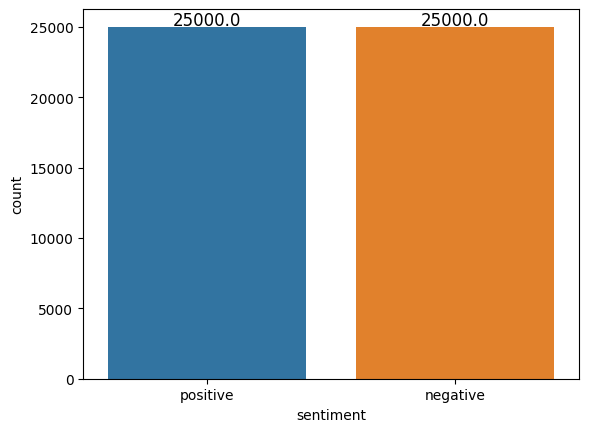

In [9]:
ax = sns.countplot(data=df, x='sentiment')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()

In [11]:
Positive_Review = df[df['sentiment']=='positive']
Negative_Review = df[df['sentiment']=='negative']

In [18]:
# Calculate average length of positive reviews
avg_length_positive = Positive_Review['review'].str.len().mean()

# Calculate average length of negative reviews
avg_length_negative = Negative_Review['review'].str.len().mean()

# Print the results
print(f"Average length of positive reviews: {avg_length_positive:.2f} characters")
print(f"Average length of negative reviews: {avg_length_negative:.2f} characters")

Average length of positive reviews: 1261.48 characters
Average length of negative reviews: 1227.99 characters


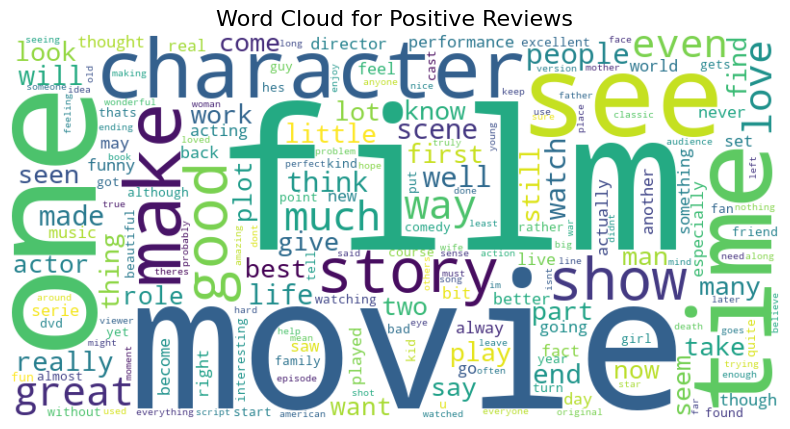

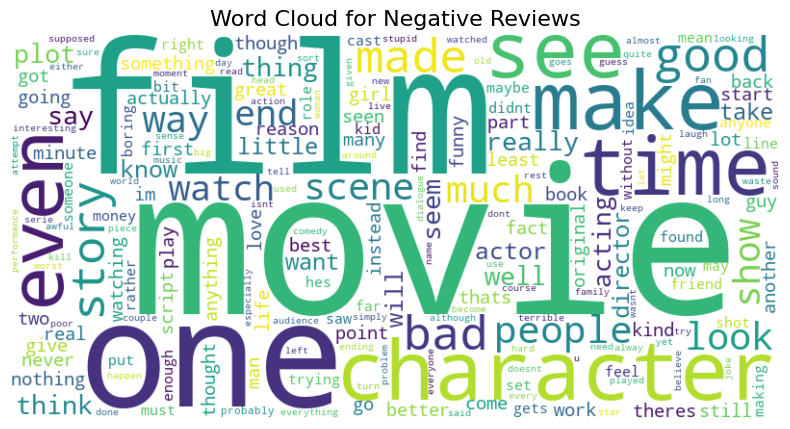

In [14]:
# Function to generate and plot word cloud
def generate_wordcloud(text_data, title):
    # Combine all reviews into a single string
    text = ' '.join(text_data)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.title(title, fontsize=16)
    plt.show()

generate_wordcloud(Positive_Review['review'], 'Word Cloud for Positive Reviews')
generate_wordcloud(Negative_Review['review'], 'Word Cloud for Negative Reviews')


In [19]:
df.to_csv('df_cleaned.csv')